In [1]:
from algorithms.utils import find_env_ids, display_id_results
from algorithms import reinforceDisc, a2cDiscMountainCar
from models import reinforceDiscreteNet, a2cDiscreteActor, a2cDiscreteCritic, learningModel, combinedModel
import gymnasium as gym
import torch.optim as optim

In [2]:


env = gym.make("MountainCar-v0")
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n

learn_actor = learningModel(a2cDiscreteActor, optim.SGD, 'SGD', [observation_space, 128, action_space], 1e-3)
learn_critic = learningModel(a2cDiscreteCritic, optim.SGD, 'SGD', [observation_space, 128, 1], 1e-3)
a2c_model = combinedModel({
    'actor' : learn_actor,
    'critic' : learn_critic
})

hypers = {
    'gamma' : 0.99,
    'epochs' : 5000,
}

test_hypers = {
    'logger_freq' : 100
}

alg = a2cDiscMountainCar(env, a2c_model, hypers)

alg.run(2, test_hypers, sound = True)
#alg.save_results()

c:\Users\joshe\Documents\Projects\Dooku\Gymnasium\algorithms\a2c_disc_mountaincar.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rewards.append(torch.tensor(reward))


Epoch length: 200
0 4
Epoch length: 200
100 11
Epoch length: 200
200 16.55
Epoch length: 200
300 21.14
Epoch length: 200
400 25.89
Epoch length: 200
500 30.41
Epoch length: 200
600 34.71
Epoch length: 200
700 39.19
Epoch length: 200
800 42.8
Epoch length: 200
900 46.63
Epoch length: 200
1000 50.07
Epoch length: 200
1100 52.28


KeyboardInterrupt: 

In [3]:
next_state, reward, terminated, truncated, _ = env.step(1)

In [4]:
import csv
import ndjson
import numpy as np
import matplotlib.pyplot as plt

def read_list_of_lists_from_csv(loc):
    all_lists = []
    with open(loc, 'r', newline='') as f:
        csvFile = csv.reader(f)
        for lines in csvFile:
            all_lists.append(lines)

    return all_lists


ids = find_env_ids("MountainCar-v0", 'results/model_alg_data.ndjson')

for id in ids:
    loc = f'results/rewards_lists/{id}.csv'

    
    lists = read_list_of_lists_from_csv(loc)

    rewards_ar = np.array(lists).astype(np.int_)
    median = np.quantile(rewards_ar, 0.5, axis = 0)
    dif = 100
    output = np.cumsum(median)[dif-1:] - np.cumsum(np.pad(median, [1, 0]))[:-dif]
    print(id, max(output)/100)
   

939c0f57-1fbf-4490-b810-098b48845e76 -200.0
4797f3a4-71d1-45b6-8049-cc8e441db9d3 -200.0


939c0f57-1fbf-4490-b810-098b48845e76
4797f3a4-71d1-45b6-8049-cc8e441db9d3


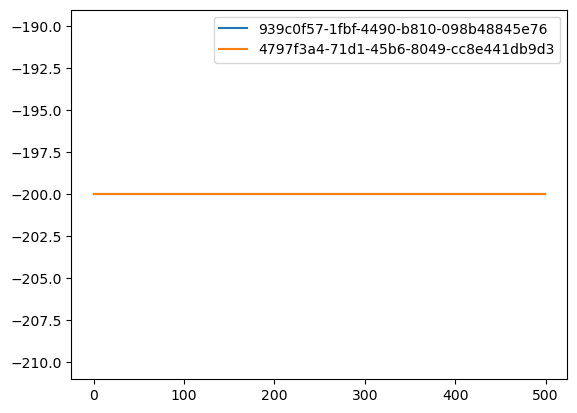

In [5]:
env_ids = find_env_ids("MountainCar-v0", 'results/model_alg_data.ndjson')
display_id_results(env_ids)

In [7]:
ids = [
    #'3e4d7661-6282-4556-8ba7-d42ab89960cc',
    'cd3a626b-6c72-4b91-b933-e2ac9144e16c',
    #'6d0867b8-6ed9-446b-9729-f90f21479987',
]


fetch_id_params(ids, 'results/model_alg_data.ndjson')
#display_id_results(ids)

[{'model_opt': {'actor': {'model': {'name': 'a2cDiscreteActor',
     'input_dim': 6,
     'output_dim': 3,
     'interim_dim': [64]},
    'optimizer': {'name': 'Adam', 'learning rate': 0.01}},
   'critic': {'model': {'name': 'a2cDiscreteCritic',
     'input_dim': 6,
     'output_dim': 1,
     'interim_dim': [64]},
    'optimizer': {'name': 'Adam', 'learning rate': 0.01}}},
  'hypers': {'gamma': 0.99, 'epochs': 500},
  'env': 'Acrobot-v1',
  'alg_name': 'a2cDisc',
  'id': 'cd3a626b-6c72-4b91-b933-e2ac9144e16c'}]

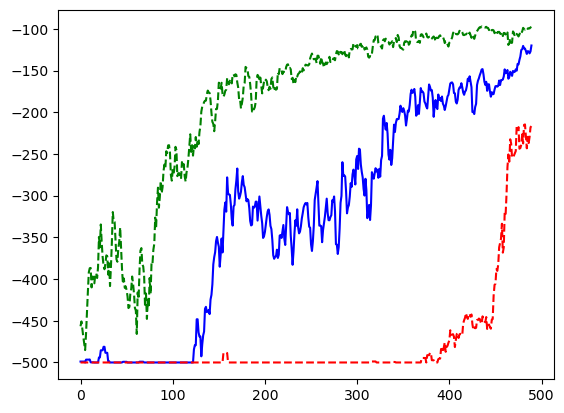

In [2]:
'''alg.run(10, test_hypers, sound = True)
alg.save_results()'''
alg.display_results()

0 -361
100 -457.42
200 -481.41
300 -457.25
400 -476.58
Completed 1/10. Estimated time left: 2058.04 seconds
0 -292
100 -379.6
200 -382.23
300 -407.59
400 -422.64
Completed 2/10. Estimated time left: 1668.32 seconds
0 -500
100 -500
200 -500
300 -500
400 -500
Completed 3/10. Estimated time left: 1529.46 seconds
0 -500
100 -500
200 -500
300 -500
400 -499.98
Completed 4/10. Estimated time left: 1338.76 seconds
0 -500
100 -488.93
200 -479.19
300 -477.31
400 -445.78
Completed 5/10. Estimated time left: 1115.35 seconds
0 -483
100 -439.72
200 -408.63
300 -418.77
400 -386.42
Completed 6/10. Estimated time left: 872.63 seconds
0 -500
100 -500
200 -500
300 -500
400 -500
Completed 7/10. Estimated time left: 664.02 seconds
0 -500
100 -485.07
200 -479.27
300 -490.83
400 -476.55
Completed 8/10. Estimated time left: 447.57 seconds
0 -500
100 -491.27
200 -490.08
300 -496.67
400 -495.87
Completed 9/10. Estimated time left: 229.13 seconds
0 -500
100 -500
200 -500
300 -500
400 -500
Completed all 10 tests!

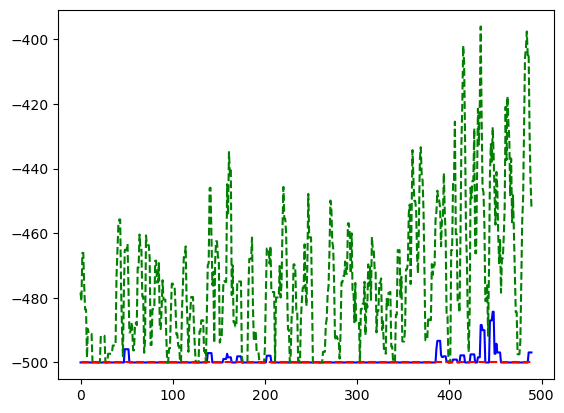

In [7]:

learn_actor = learningModel(a2cDiscreteActor, optim.Adam, 'Adam', [observation_space, 128, action_space], 1e-4)
learn_critic = learningModel(a2cDiscreteCritic, optim.Adam, 'Adam', [observation_space, 128, 1], 1e-4)
a2c_model = combinedModel({
    'actor' : learn_actor,
    'critic' : learn_critic
})

hypers = {
    'gamma' : 0.99,
    'epochs' : 500,
}

test_hypers = {
    'logger_freq' : 100
}

alg = a2cDisc(env, a2c_model, hypers)

alg_data = alg.return_params()

alg.run(10, test_hypers, sound = True)
alg.save_results()

alg.display_results()

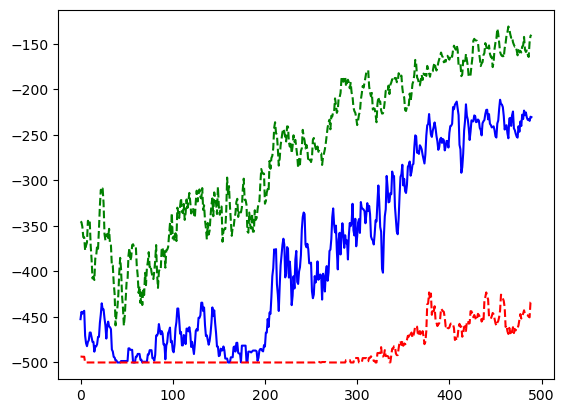

In [5]:

learn_actor = learningModel(a2cDiscreteActor, optim.Adam, 'Adam', [observation_space, 128, action_space], 1e-3)
learn_critic = learningModel(a2cDiscreteCritic, optim.Adam, 'Adam', [observation_space, 128, 1], 1e-3)
a2c_model = combinedModel({
    'actor' : learn_actor,
    'critic' : learn_critic
})

hypers = {
    'gamma' : 0.95,
    'epochs' : 500,
}

test_hypers = {
    'logger_freq' : 100
}

alg = a2cDisc(env, a2c_model, hypers)

alg_data = alg.return_params()

'''alg.run(10, test_hypers, sound = True)
alg.save_results()'''

alg.display_results()

In [9]:

learn_actor = learningModel(a2cDiscreteActor, optim.Adam, 'Adam', [observation_space, 128, action_space], 1e-4)
learn_critic = learningModel(a2cDiscreteCritic, optim.Adam, 'Adam', [observation_space, 128, 1], 1e-4)
a2c_model = combinedModel({
    'actor' : learn_actor,
    'critic' : learn_critic
})

hypers = {
    'gamma' : 0.95,
    'epochs' : 500,
}

test_hypers = {
    'logger_freq' : 100
}

alg = a2cDisc(env, a2c_model, hypers)

alg_data = alg.return_params()
'''
alg.run(10, test_hypers, sound = True)
alg.save_results()'''

alg.display_results()

{'model_opt': {'actor': {'model': {'name': 'a2cDiscreteActor', 'input_dim': 6, 'output_dim': 3, 'interim_dim': [128]}, 'optimizer': {'name': 'Adam', 'learning rate': 0.0001}}, 'critic': {'model': {'name': 'a2cDiscreteCritic', 'input_dim': 6, 'output_dim': 1, 'interim_dim': [128]}, 'optimizer': {'name': 'Adam', 'learning rate': 0.0001}}}, 'hypers': {'gamma': 0.95, 'epochs': 500}, 'env': 'Acrobot-v1', 'alg_name': 'a2cDisc'}


FileNotFoundError: [Errno 2] No such file or directory: 'results/rewards_lists/4f2994c3-ac34-4b2a-87ca-1913ec72859a.csv'